In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from data_utils import get_top_k_crossings_originals, get_originals_set

In [2]:
DATASET_NAME = 'milknew'

In [3]:
data = pd.read_csv(f'../data/output/crossed_imp_{DATASET_NAME}_d1.csv')

In [4]:
data['feature'] = data['Unnamed: 0']
data = data.drop('Unnamed: 0', axis=1)

In [5]:
k=1

In [6]:
top_k = get_top_k_crossings_originals(data, k=k)

In [7]:
top_k_originals = get_originals_set(top_k)

In [8]:
original_features = data[data['rank'].isna()][['feature', 'importance']]

In [9]:
sorted_original_features = original_features.sort_values(by='importance', ascending=True)

In [10]:
sorted_original_features.reset_index(drop=True, inplace=True)

In [11]:
importances_mapping = sorted_original_features.to_dict()['feature']

In [12]:
inverted_imp_map = {v: k for k, v in importances_mapping.items()}

In [13]:
top_k_indeces = [inverted_imp_map[feature] for feature in top_k_originals]

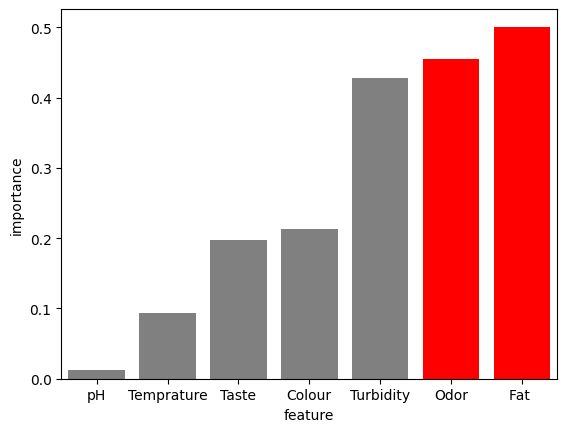

In [21]:
ax = sns.barplot(original_features, x='feature', y='importance', color='gray')
# ax.patches[3].set_facecolor('b')
for ind in top_k_indeces:
    ax.patches[ind].set_facecolor('r')
plt.savefig(f'../data/vis/k{k}/{DATASET_NAME}_k{k}')

<Figure size 640x480 with 0 Axes>